# MagNet: Model the Geomagnetic Field Chapter 1
## Develop the LSTM Model


![HELIO_GRAPHIC_URL](https://ngdc.noaa.gov/geomag/img/challenge-banner.png "HELIO")

* Creator(s): Rob.Redmon@noaa.gov (1,2), Manoj.C.Nair@noaa.gov (2,3), LiYin.Young@noaa.gov (2,3)
* Affiliation(s):
    * 1. National Centers for Environmental Information ([NCEI](https://www.ncei.noaa.gov/)), National Oceanic and Atmospheric Administration (NOAA),
    * 2. NOAA Center for Artificial Intelligence ([NCAI](https://noaa.gov/ai)),
    * 3. Cooperative Institute for Research for Environmental Sciences [CIRES](https://cires.colorado.edu/).
* History
    * 2023-08: Content reorganized for the [NCAI](https://noaa.gov/ai) <i>Learning Journey</i> library. No significant technical changes from previous version.
    * 2022-06: Initial notebook version developed for the [TAI4ES 2022 Summer School](https://www2.cisl.ucar.edu/events/tai4es-2022-summer-school).
* Acknowledgements:
    * Original funding support was provided by the NCEI Innovates program.
    * Post-model inference and evaluation were created for the NCAR and [AI2ES](https://www.ai2es.org/) [TAI4ES 2022 Summer School](https://www2.cisl.ucar.edu/events/tai4es-2022-summer-school).
    * Feature exploration through model training was inspired by the benchmark [DrivenData blogpost](https://www.drivendata.co/blog/model-geomagnetic-field-benchmark/), developed for NOAA's [MagNet competition](https://ngdc.noaa.gov/geomag/mag-net-challenge.html).

---

## Overview
<b>Chapter 1 "Develop the LSTM Model"</b> of the two notebook series, provides the benchmark machine learning modeling experience for a key space weather storm indicator, the disturbance-storm-time (<i>Dst</i>) index, for the 2020 NOAA competition, "MagNet: Model the Geomagnetic Field".

### Prerequisites

* <b>Python intermediate proficiency for data science:</b> SciPy, Pandas, NumPy, MatplotLib,
* <b>Machine Learning intermediate experience:</b> ML for supervised modeling of time series data using neural networks. We use the Keras framework for TensorFlow in this notebook to create a Long Short-Term Memory (LSTM) recurrent neural network,
* <b>Space Weather introductory knowledge:</b> Basic familiarity of the Solar Wind and the Disturbance Storm Time activity index (<i>Dst</i>). For introductory materials on space weather and its effects on the technological systems we rely on, two resources are:
    * [NASA's Space Place](https://spaceplace.nasa.gov/spaceweather/),
    * [NOAA's Space Weather Prediction Center (SWPC)](https://www.swpc.noaa.gov/), in particular their community dashboards.

### Targeted Level
This notebook is targeted towards learners with beginner to intermediate experience in space weather topics, and intermediate experience in modeling time series data with neural networks.

### Learning Outcomes

By engaging in this notebook, the learner will:
1. Gain experience developing a regression model to predict the space weather disturbance-storm-time (<i>Dst</i>) index.
2. Build the functional benchmark LSTM recurrent neural network model from the NOAA MagNet competition.
2. Get familiar with using imperfect solar wind observations, as the modeling features.
3. Run the trained model on classical space weather events.

<div class="alert alert-block alert-info">
<b>Info: </b>
In this notebook, you'll notice color-coded boxes, which provide hints, exercises, and warnings. Here is the color-coding breakdown:
</div>

* <span style="color:blue">Hint/Tip/Info: </span> Helpful context and guidance, as a blue alert-info box
* <span style="color:green">Exercise: </span> Interactive activity / exercise, as a green alert-success box
* <span style="color:orange">Be Aware: </span> Caution / Caveat, as a yellow alert-warn box
* <span style="color:red">Danger: </span> Conditions under which code may create an error, as a red alert-danger box

---

## Tutorial Material

### Background on Geospace Space Weather

Just like the terrestrial weather we are used to experiencing in our daily lives, weather also occurs in the space environment. If you'd like a general primer on space weather and its effects on the technological systems we rely on, check out [NASA's Space Place](https://spaceplace.nasa.gov/spaceweather/), as well as [NOAA's Space Weather Prediction Center (SWPC)](https://www.swpc.noaa.gov/), in particular their community dashboards.

### Background on the Geomagnetic Field

The efficient transfer of energy from solar wind into the Earth’s magnetic field causes geomagnetic storms. The resulting variations in the magnetic field increase errors in magnetic navigation. The disturbance-storm-time index, or <i>Dst</i>, is a measure of the severity of the geomagnetic storm.

As a key specification of the magnetospheric dynamics, the <i>Dst</i> index is used to drive geomagnetic disturbance models such as NOAA/NCEI’s High Definition Geomagnetic Model - Real-Time (HDGM-RT).
![HDGMRT_GRAPHIC_URL](https://www.ngdc.noaa.gov/geomag/HDGM/images/HDGM-RT_2003_storm_720p.gif "HDGM-RT")

In 2020-2021, NOAA and NASA conducted an international crowd sourced data science competition “MagNet: Model the Geomagnetic Field”:
https://www.drivendata.org/competitions/73/noaa-magnetic-forecasting/

Empirical models have been proposed as early as in 1975 to forecast <i>Dst</i> solely from solar-wind observations at the Lagrangian (L1) position by satellites such as NOAA’s Deep Space Climate Observatory (DSCOVR) or NASA's Advanced Composition Explorer (ACE). Over the past three decades, several models were proposed for solar wind forecasting of <i>Dst</i>, including empirical, physics-based, and machine learning approaches. While the ML models generally perform better than models based on the other approaches, there is still room to improve, especially when predicting extreme events. More importantly, we intentionally sought solutions that work on the raw, real-time data streams and are agnostic to sensor malfunctions and noise.

### Software
This notebook has been tested using the following environments:
* Google Colaboratory (Python 3.10.12) with no need to install additional packages.
    * CPU, GPU, TPU tested
* Anaconda (Python 3.9.16) with the following key package versions:
    * Keras TensorFlow 2.8.0
    * Pandas 1.5.3
    * Matplotlib 3.7.1
    * CPU, and GPU tested

---

### Modeling Task

The MagNet competition task was to develop models for forecasting <i>Dst</i> that push the boundary of predictive performance, under operationally viable constraints, using the real-time solar-wind (RTSW) data feeds from NOAA’s DSCOVR and NASA’s ACE satellites. Improved models can provide more advanced warning of geomagnetic storms and reduce errors in magnetic navigation systems. Specifically, given one week of data ending at t minus 1 minute, the model must forecast <i>Dst</i> at time t and t plus one hour.

The model described in this notebook is the benchmark model provided by the MagNet competition organizers. Long Short Term Memory networks or LSTMs are a special kind of recurrent neural network especially suited to learning nonlinear relationships between long period time series sequences. In this <b>Chapter 1</b> notebook, we will show you how to implement a first-pass LSTM model for predicting <i>Dst</i>.

<div class="alert alert-block alert-success">
<b>Exercise: </b> Can you describe the physical process between solar wind and ground geomagnetic disturbances? 
What is the <i>Dst</i> index primarily used for?
How might these infrequent solar wind events make modeling their predicted effects challenging? 
How might you make an accurate model with very few extreme events/samples?
</div>

<div class="alert alert-block alert-info">
<b>Tip: </b>Roughly 85% of the time, near Earth is geomagnetically quiet.
</div>

### Data Summary

The target <i>Dst</i> values are measured by 4 ground-based observatories near the equator. These values are then averaged to provide a measurement of <i>Dst</i> for any given hour.
To ensure similar distributions between the training and test data, the data is separated into three non-contiguous periods. All data are provided with a `period` and `timedelta` multi-index which indicates the relative timestep for each observation within a period, but not the real timestamp. The period identifiers and timedeltas are common across datasets. Converting back from our index date and time to real geophysical date and time is as simple as adding the  start date/time in the table below to the relative timestep provided with the data.

<div style="text-align: center">Table: Dataset Period Time Ranges</div>

| Period  | Beginning               | End                      |
|---------|-------------------------|--------------------------|
| train_a | 1998, 2, 16, '00:00:00' | 2001, 5, 31, '23:59:00'  |
| train_b | 2013, 6, 1, '00:00:00'  | 2019, 5, 31, '23:59:00'  |
| train_c | 2004, 5, 1, '00:00:00'  | 2010, 12, 31, '23:59:00' |
|  test_a | 2001, 6, 1, '00:00:00'  | 2004, 4, 30, '23:59:00'  |
|  test_b | 2011, 1, 1, '00:00:00'  | 2013, 5, 31, '23:59:00'  |
|  test_c | 2019, 6, 1, '00:00:00'  | 2020, 10, 31, '23:59:00' |


![Figure_Activity_and_Training_Splits.png](https://github.com/ai2es/tai4es-trustathon-2022/raw/space/space/notebook_figures/Figure_Activity_and_Training_Splits.png)
<i>Figure: Plot shows solar activity as the sunspot number (SSN) (red), the geomagnetic disturbance-storm-time (<i>Dst</i>) index (blue), and the data segments. The time range shown is January 1998 through December 2022, roughly corresponding to two solar-cycles. The data for periods “train_a”, “train_b”, and “train_c”  were provided to the participants as “public” data. The data for periods “test_a”, “test_b” and “test_c” were held back for “private” validation. This figure and the table preceding it have been adapted from Nair et al (manuscript in preparation).</i>

The competitors used the training part (“train_a”,”train_b” and “train_c”) data to develop and improve their models. When they submitted a model, the competition platform used the test data sets (“test_a”,”test_b” and “test_c”)  to calculate the accuracy of the model. The model evaluation was done separately for a public leaderboard and for a private leaderboard. The public leaderboard was openly accessible whereas the private leaderboard was restricted to the competition administrators. The  data from all of the training sets (a, b, and c) were used on the public leaderboard and private leaderboard. We randomly sampled rows to be included in the public and private leaderboard. Based on relative performance from the public leaderboard as a clue, the teams iterated their models. The final ranking of the models was done on the private leaderboard.

<b>Input data sources (i.e. features)</b>:
* Satellite measurements of the solar wind, including direction, speed, density and temperature, at 1-minute cadence.
* Position of the satellite used for solar wind measurements. The ACE and DSCOVR satellites are positioned just outside Earth's exosphere approximately 1% of the distance from Earth to Sun. As noted above, this is referred to as the Sun Earth L1 position.
* Number of sunspots on the Sun, measured monthly.

<div class="alert alert-block alert-info">
<b>Info:</b> Here is a short description of several of these inputs (features) observed by the ACE or DSCOVR satellites:

* bt - Interplanetary-magnetic-field magnitude (nT)
* bx_gsm - Interplanetary-magnetic-field X-component in geocentric solar magnetospheric (GSM) coordinate (nT)
* by_gsm - Interplanetary-magnetic-field Y-component in GSM coordinate (nT)
* bz_gsm - Interplanetary-magnetic-field Z-component in (GSM) coordinate (nT)
* density - Solar wind proton density (N/cm^3)
* speed - Solar wind bulk speed (km/s) flowing from Sun to Earth
* temperature - Solar wind ion temperature (Kelvin)
</div>

(See [here](https://www.drivendata.org/competitions/73/noaa-magnetic-forecasting/page/279/) for the full list)

To get a feeling for the GSM coordinate reference frame:

The X-axis is oriented from the Earth to the Sun. The positive Z-axis is chosen to be in the same sense as the northern magnetic pole. And the Y-axis is defined to be perpendicular to the Earth's magnetic dipole so that the X-Z plane contains the dipole axis. For additional details, see [here](https://www.spenvis.oma.be/help/background/coortran/coortran.html#GSM).

To see how several of these parameters look during an example space weather event see [Figure 5](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2018SW001897#swe20716-fig-0005) of Redmon et al., 2018.

### Acquire Data

<div class="alert alert-block alert-info">
<b>Info: </b>
The competition discussed in this notebook used <i>public</i> data for development and the public leaderboard. A <i>private</i> dataset was kept internal during the competition for use in scoring by the organizers. Since the competition has passed, both datasets are publicly accessible from NOAA. We will build and evaluate the model using the competition's <i>public</i> data and evaluate storm event case studies using the competition's <i>private</i> data.
</div>

In [1]:
# Download data we need: If directory "data/" already exists, we'll assume the data are already downloaded.
# The files are 381 MB zipped and 1.2 GB unzipped
# Retrieving these files from NOAA takes 30-60 seconds on a home internet connection.

import os, urllib, zipfile

dir_data = 'data/'
if not os.path.isdir(dir_data):
    os.mkdir(dir_data)

    # Zenodo URLs
    urls = ['https://zenodo.org/record/8197443/files/public.zip?download=1',
            'https://zenodo.org/record/8197443/files/private.zip?download=1']
    
    # NOAA URLs (same exact data as on Zenodo) -- uncomment to download from NOAA
    #     urls = ['https://ngdc.noaa.gov/geomag/data/geomag/magnet/public.zip',
    #             'https://ngdc.noaa.gov/geomag/data/geomag/magnet/private.zip']

    # Download and unzip each file
    for url in urls:
        zip_path, _ = urllib.request.urlretrieve(url)
        with zipfile.ZipFile(zip_path, "r") as f:
            print('Downloaded ', url, ', now unzipping.')
            f.extractall(dir_data)

# Print list of data files:
print('\nData files for input (features) and output Dst (labels):')
for dir_pubpriv in ['public/', 'private/']:
    print(dir_data+dir_pubpriv)
    for path, dirs, files in os.walk(dir_data+dir_pubpriv): 
        for f in files: print('\t', f)

Downloaded  https://ngdc.noaa.gov/geomag/data/geomag/magnet/public.zip , now unzipping.
Downloaded  https://ngdc.noaa.gov/geomag/data/geomag/magnet/private.zip , now unzipping.

Data files for input (features) and output Dst (labels):
data/public/
	 satellite_positions.csv
	 dst_labels.csv
	 solar_wind.csv
	 sunspots.csv
data/private/
	 satellite_positions.csv
	 dst_labels.csv
	 solar_wind.csv
	 sunspots.csv


In [2]:
# Modules we need to get started and Matplotlib configuration:
import numpy as np, pandas as pd, pprint
import matplotlib.pyplot as plt

# The next two lines are nice for Jupyter, but not available for Colab:
#%load_ext nb_black
#%matplotlib inline

# Matplotlib Configuration
import matplotlib.pyplot as plt
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

#### Import  Input (Features) and Output (Labels) as Pandas DataFrames
<div class="alert alert-block alert-info">
<b>Info:</b> As described above, the input data is a time series of solar wind measurements at L1 along with sunspot number, and the output data is a time series of <i>Dst</i>. Recall that for the past competition, the competitors did not have the real geophysical date/time. So here, we will recreate a new column of real geophysical date/time from our timedelta and the table shown in "Data Summary".
</div>

In [3]:
# From our time range table in the "Data Summary" section:
period_ranges = {
    'train_a':[pd.Timestamp('1998/2/16 00:00:00'), pd.Timestamp('2001/5/31  23:59:00')],
    'train_b':[pd.Timestamp('2013/6/1  00:00:00'), pd.Timestamp('2019/5/31  23:59:00')],
    'train_c':[pd.Timestamp('2004/5/1  00:00:00'), pd.Timestamp('2010/12/31 23:59:00')],
    'test_a' :[pd.Timestamp('2001/6/1  00:00:00'), pd.Timestamp('2004/4/30  23:59:00')],
    'test_b' :[pd.Timestamp('2011/1/1  00:00:00'), pd.Timestamp('2013/5/31  23:59:00')],
    'test_c' :[pd.Timestamp('2019/6/1  00:00:00'), pd.Timestamp('2020/10/31 23:59:00')]}

def convert_timedelta_to_datetime( df ):
    """Adds real geophysical datetimes to our DataFrame using the original "index" timestamps.
    
    The relative "index" timestamps were used in the MagNet competition datasets since all of the data
    were in the public domain.
    
    Parameters
    ----------
    df: pd.DataFrame
        Includes index time
    
    Returns
    -------
    df_datetimes: pd.DataFrame
        Adds datetimes to the input pd.DataFrame
    """
    df_datetimes = pd.DataFrame(index=df.index)
    df_datetimes['datetime'] = pd.NaT     # like Numpy NaN

    i = 0
    for period_name, timedelta in df.index:
        start_time = period_ranges[period_name][0]
        datetime = timedelta + start_time                 # add Pandas Timedelta to Pandas Timestamp
        df_datetimes['datetime'].values[i] = datetime
        i += 1

        #print('%s: %s + %s = %s' % (period_name, timedelta, start_time, df['datetime'].values[i]))

    return df_datetimes

In [4]:
# Import as Pandas DataFrames
from pathlib import Path
DATA_PATH = Path("data/public/")

print('Reading in the Dst output data...')
dst = pd.read_csv(DATA_PATH / "dst_labels.csv")
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Sunspot input data...')
sunspots = pd.read_csv(DATA_PATH / "sunspots.csv")
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Solarwind input data...')
solar_wind = pd.read_csv(DATA_PATH / "solar_wind.csv")
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Satellite position input data...')
satellite_positions = pd.read_csv(DATA_PATH / "satellite_positions.csv")
satellite_positions.timedelta = pd.to_timedelta(satellite_positions.timedelta)
satellite_positions.set_index(["period", "timedelta"], inplace=True)


Reading in the Dst output data...
Reading in the Sunspot input data...
Reading in the Solarwind input data...
Reading in the Satellite position input data...


### Data Exploration
<div class="alert alert-block alert-info">
<b>Info:</b> We'll explore our input (feature) and output (label) data to better understand it's data architecture, statistical description and basic input-output relationships.</div>

#### Disturbance Storm-Time Index (<i>Dst</i>)

In [5]:
# The structure of our output (label) data, Dst time series:
print("Dst shape: ", dst.shape)
dst.head(n=3)

Dst shape:  (139872, 1)


dst
period  timedelta           
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10

In [6]:
# Summary statistics for Dst by training period, via the DataFrame.groupby function.
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

#### Visualize <i>Dst</i> distributions for the training periods

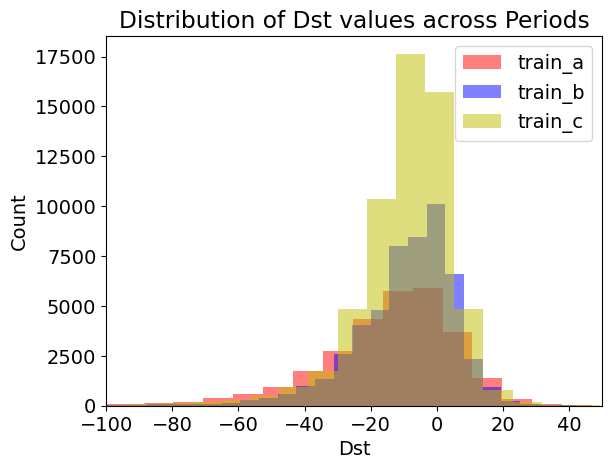

In [7]:
# Plot Dst histogram for each of our 3 training periods
fig, ax = plt.subplots()
colors = ["r", "b", "y"]
# Use Pandas DataFrame.groupby function to organize our Dst data by training period
for i, period in enumerate(dst.groupby("period")):
    period_name, df = period
    # FYI: For Python 3.7, (e.g. previous Google Colaboratory w/Matplotlib 3.2.2), in the call to ax.hist(), you need to transpose the DataFrame.
    #      For Python 3.8+ (e.g. 3.9.7, with Matplotlib 3.5.1) it seems no transpose is needed, thus this version switch.
    #      Below we differentiate on Python version, while you might want to differentiate on Matplotlib version.
    #      Error message you might see if DataFrame isn't oriented correctly:
    #           "ValueError: color kwarg must have one color per data set. 28824 data sets and 1 colors were provided"
    import sys
    from packaging import version
    sys_major_version = '.'.join(sys.version.split('.')[:2])
    if version.parse(sys_major_version) <= version.parse('3.7'):
        ax.hist(df.T, alpha=0.5, color=colors[i], bins=50, label=period_name)
    else:
        ax.hist(df,   alpha=0.5, color=colors[i], bins=50, label=period_name)
    ax.set_xlim([-100,50])
    ax.set_xlabel('Dst')
    ax.set_ylabel('Count')

plt.legend()
plt.title("Distribution of Dst values across Periods")
plt.show()

#### Solar Wind and Sunspots
This is our time series input (feature) data.

In [8]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head(n=3)     # Just print the first 3 rows of our input (features) DataFrame

Solar wind shape:  (8392320, 15)


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac

In [9]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head(n=3)

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9

In [10]:
# Summary statistics for solar wind inputs (features) by training period.
#     We use the transpose operator to rotate the orientation of the printed table.
solar_wind.groupby("period").describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

In [11]:
# Summary statistics for Sunspot Number inputs (features) by training period.
#     We use the transpose operator to rotate the orientation of the printed table.
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

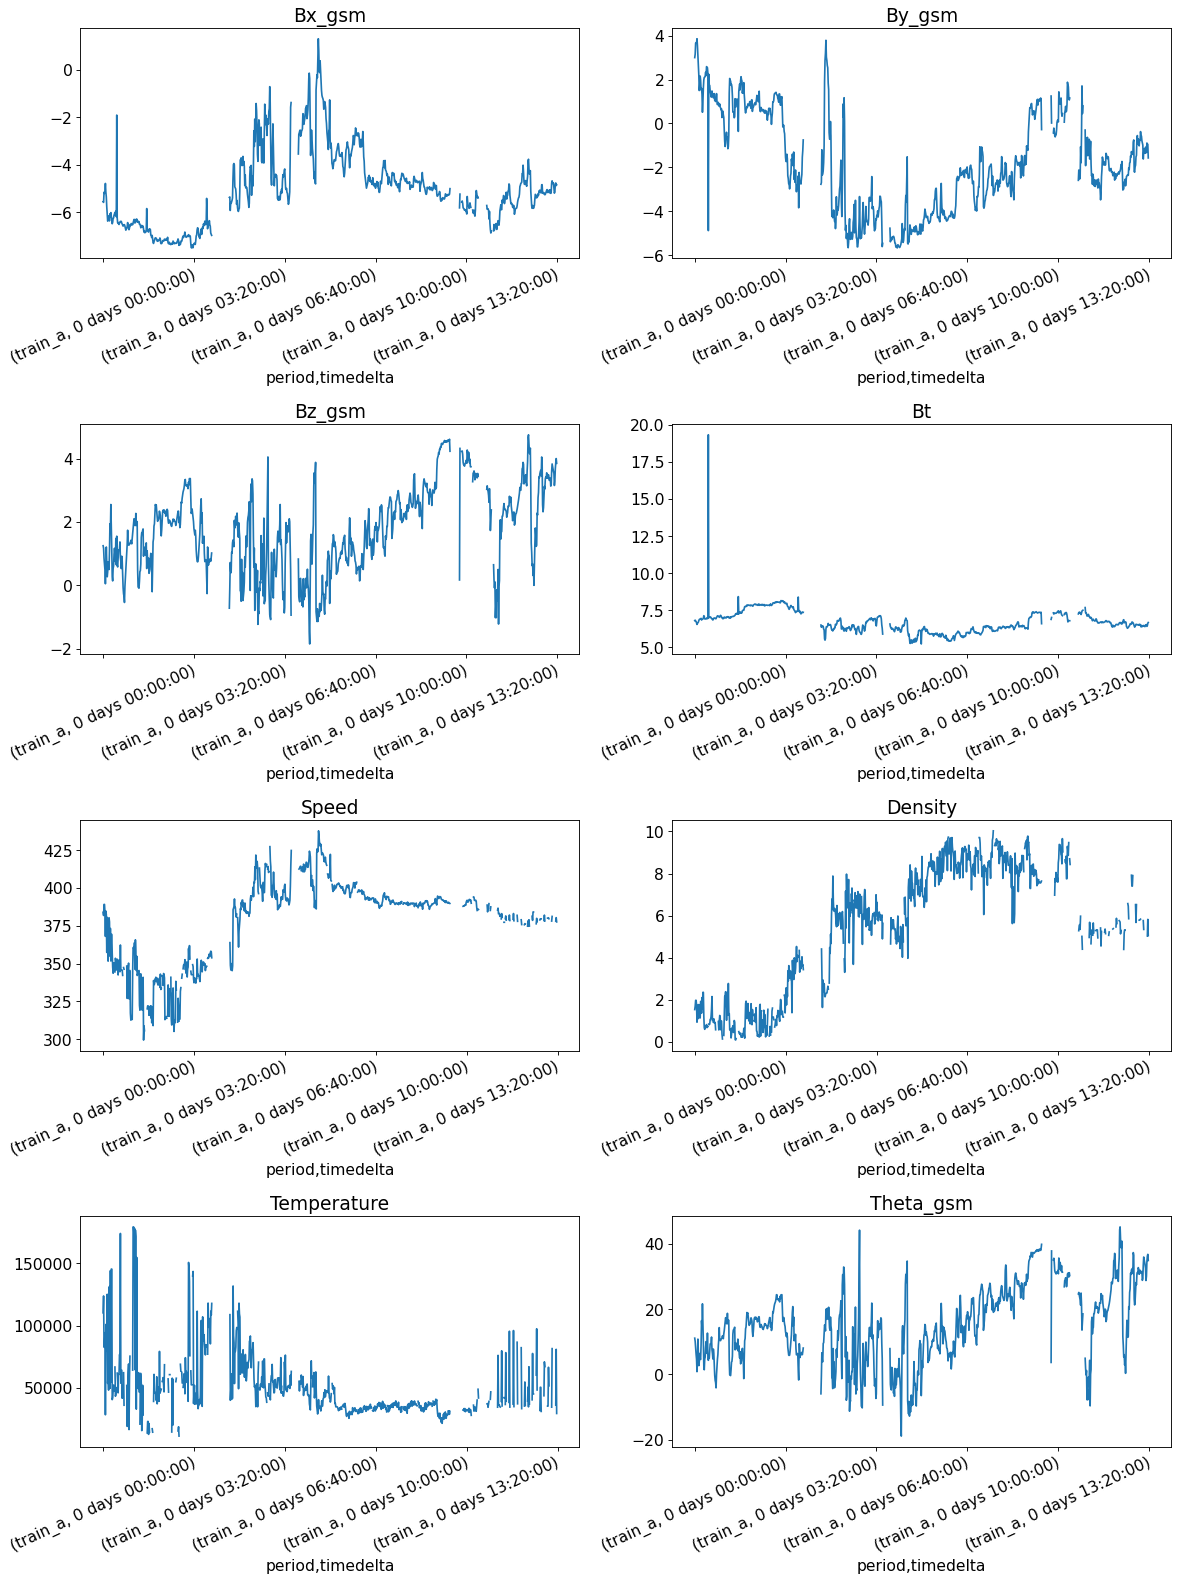

In [12]:
def show_raw_visualization(data):
    """Plots solar wind parameters on a grid.
    
    Parameters
    ----------
    data: pd.DataFrame
        Just the columns we want plotted.
    """

    # Grid of 4 x 2
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        # Uses Pandas.DataFrame.plot method
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],         # Indicate subplot row and column (left to right, top to bottom)
            title=f"{key.capitalize()}",
            rot=25,                         # rotate x-axis markers by 25 degrees
        )

    fig.subplots_adjust(hspace=0.8)         # reduce space between plots
    plt.tight_layout()                      # place as close together as possible

cols_to_plot = ["bx_gsm", "by_gsm", "bz_gsm", "bt", "speed", "density", "temperature", "theta_gsm"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

### Feature Relationships

Data gaps in the Solar Wind data are a common issue with real-time data

<div class="alert alert-block alert-warning">
<b>Be Aware:</b> Gaps in our input (features) are something we'll need to deal carefully with, i.e. in the preprocessing steps below.
</div>

In [13]:
# What percent of the time are there gaps in these data?
print('Data gaps in solar input (features) as % of data:')
solar_wind.isna().sum()/len(solar_wind)*100

Data gaps in solar input (features) as % of data:


bx_gse         3.883169
by_gse         3.883169
bz_gse         3.883169
theta_gse      3.883169
phi_gse        3.889127
bx_gsm         3.883169
by_gsm         3.883169
bz_gsm         3.883169
theta_gsm      3.883169
phi_gsm        3.889127
bt             3.883169
density        8.160914
speed          8.216500
temperature    9.672748
source         3.775071
dtype: float64

<div class="alert alert-block alert-info">
<b>Info: </b>There are several challenges when working with these "operational" observations of the solar wind will we need to solve before modeling (e.g. missing data).
</div>

In [14]:
# Correlation matrix:
#     Note that this is a slow command (several minutes) unless you have a GPU or TPU equivalent processor (then it's ~1 min).
#     Take advantage of Pandas DataFrame and merge our Input (Feature) and Output (Label) data.
#     I.e. merge, Solar Wind + Sunspots + Satellite Location + Dst
corr = solar_wind.join(sunspots).join(satellite_positions).join(dst).fillna(method="ffill").corr()

/var/folders/gn/wpms4v_901b0vzv2mvgcyrcdyqktl4/T/ipykernel_72295/1827713272.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = solar_wind.join(sunspots).join(satellite_positions).join(dst).fillna(method="ffill").corr()


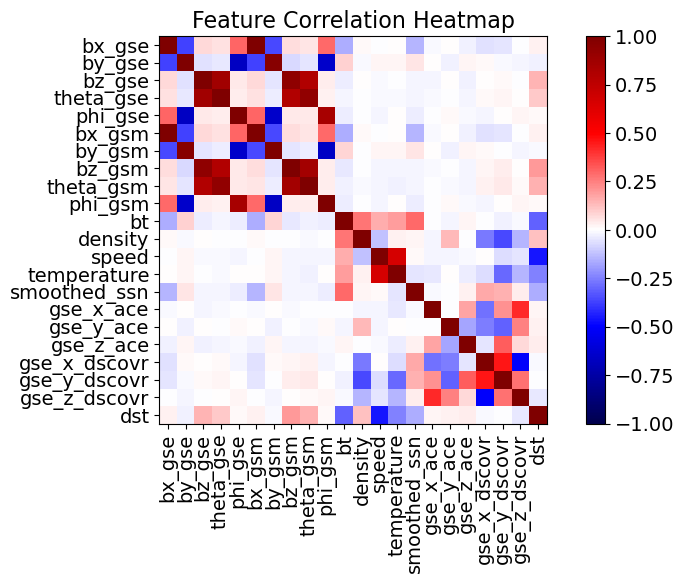

In [15]:
# We use the 'seismic' color map so we have a high contrast, symmetric gradient about 0. 
plt.figure(figsize=(10, 5))
plt.matshow(corr, cmap='seismic', vmin=-1, vmax=1, fignum=1)
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(corr.shape[1]), corr.columns)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b>Info: </b>Note which input (features) are correlated with each other and which ones are correlated with our output <i>Dst</i>. Note that the satellite location does not seem to be important for this modeling use case.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> You might like to consult the input parameter descriptions in the "Data Summary" section near the top of this notebook.
</div>

### Feature Generation

#### Set seeds for reproducibility

In [16]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(2020)
set_seed(2021)

#### Feature / Input Data we'll use to Train the Model

<div class="alert alert-block alert-info">
<b>Info: </b> It's good to think about what features we'd recommend for use in developing our model. An additional exercise at the end of this notebook has learners try different sets of features. You can do so simply by adjusting the "SOLAR_WIND_FEATURES" list below. 
</div>

In [17]:
# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gsm",
    "by_gsm",
    "bz_gsm",
    "speed",
    "density",
]

In [18]:
# The model will be built on feature statistics, mean and standard deviation
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)

<div class="alert alert-block alert-info">
<b>Info: </b>As discussed above, we'll need to fill in gaps and create statistical summaries (hourly means and standard deviations) of our features before modeling. The following routines provide this "preprocessing" functionality of gap filling, and scaling by features' statistics.
</div>

In [19]:
from sklearn.preprocessing import StandardScaler

def impute_features(feature_df):
    """Imputes (inplace) missing input (feature) data.
    
    Imputes using the following methods:
    `smoothed_ssn` - forward fill
    `solar_wind` - interpolation
    
    Parameters
    ----------
    feature_df : pd.DataFrame
        Our original input (feature) data which has gaps.
    
    Returns
    -------
    feature_df : pd.DataFrame
        Updated input (feature) data with gaps filled, inplace using the input DataFrame.
    """

    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolate between missing solar wind values
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates input (features) to the floor of each hour using mean and standard deviation.
    
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    
    feature_df : pd.DataFrame
        Our original input (feature) data to be aggregated.
        
    aggs : ["mean", "std"] 
        Specifies the desired method, either "mean" or "std".
    
    Returns
    -------
    agged : pd.DataFrame
        New input (feature) data aggregated per chosen method.
    """

    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None, subset=None):
    """Preprocesses the input (feature) data.

    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
        
    Parameters
    ----------
    solar_wind : pd.DataFrame
        Will be imputed (gap filled), aggregated (hourly), joined to sunspots, and scaled.
    
    sunspots : pd.DataFrame
        Will be scaled and joined to the imputed, aggregated, scaled solar_wind.
    
    scaler : sklearn.preprocessing.StandardScaler, None, optional
        If not provided, a StandardScaler() instance is created.
    
    subset: None, iterable, optional
        Subset of the "solar_wind" features we'd like processed.

    Returns
    -------
    imputed : pd.DataFrame
        This is the solar_wind hourly aggregated joined with "sunspots", and scaled.

    scaler : sklearn.preprocessing.StandardScaler
        The scaler that was used to normalize the solar_wind and sunspots.
    
    """

    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler

In [20]:
features, scaler = preprocess_features(solar_wind, sunspots, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head(n=3)

(139872, 15)


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.499705  2.443614         -0.375267   
        0 days 01:00:00  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  0.739905 -0.770240         -0.574831   

                         temperature_std  bx_gsm_mean  bx_gsm_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.600307   -0.381727   
        0 days 01:00:00         0.953178    -1.759200   -0.868044   
        0 days 02:00:00        -0.192518    -1.913422   -1.114649   

                         by_gsm_mean  by_gsm_std  bz_gsm_mean  bz_gsm_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.434424    0.021156     0.292754   -0.645095   
        0 days 01:00:00     0.189021   -0.282845     0.433737   -0.511040   
        0 days 02:00:00     0.193116   -0.831526     0.747220   -0.870482   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444

In [21]:
# check to make sure missing values are filled
assert (features.isna().sum() == 0).all()

<div class="alert alert-block alert-info">
<b>Info:</b> We also need to prepare our output (labels), i.e. our space weather storm index <i>Dst</i>, which is already a time series with an hourly cadence. The modeling task is to predict <i>Dst</i> at hour t0 and the next hour t1.
</div>

In [22]:
YCOLS = ["t0", "t1"]


def process_labels(dst):
    """Create dst[t0] (current time) and dst[t1] (next hour) labels and group by training periods.
    
    This is needed because we wish to train the model on predicting Dst at the current time (t0)
    and for the next hour (t1). The method is a simple Pandas DataFrame array timeshift from dst[0:] to get dst[1:].
    
    Parameters
    ----------
    dst : pd.DataFrame
    
    Returns
    -------
    y : pd.DataFrame
        New copy of dst pd.DataFrame now including shifted Dst, and is grouped by training period.
        This is what we will train the model on.
    """

    y = dst.copy()
    y["t0"] = y.groupby("period").dst.shift( 0)
    y["t1"] = y.groupby("period").dst.shift(-1)
    return y[YCOLS]


labels = process_labels(dst)
labels.head(n=5)

t0    t1
period  timedelta                
train_a 0 days 00:00:00  -7 -10.0
        0 days 01:00:00 -10 -10.0
        0 days 02:00:00 -10  -6.0
        0 days 03:00:00  -6  -2.0
        0 days 04:00:00  -2   3.0

<div class="alert alert-block alert-info">
<b>Tip:</b> For convenience, join our processed solar wind hourly inputs (features) and our <i>Dst</i> (labels) into one Pandas DataFrame.
</div>

In [23]:
# Now we are ready to join our input (solar wind & sunspot features) and our output (Dst labels)
data = labels.join(features)
data.head(n=3)

t0    t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                         
train_a 0 days 00:00:00  -7 -10.0  0.499705  2.443614         -0.375267   
        0 days 01:00:00 -10 -10.0  0.547177 -0.224580         -0.479430   
        0 days 02:00:00 -10  -6.0  0.739905 -0.770240         -0.574831   

                         temperature_std  bx_gsm_mean  bx_gsm_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.600307   -0.381727   
        0 days 01:00:00         0.953178    -1.759200   -0.868044   
        0 days 02:00:00        -0.192518    -1.913422   -1.114649   

                         by_gsm_mean  by_gsm_std  bz_gsm_mean  bz_gsm_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.434424    0.021156     0.292754   -0.645095   
        0 days 01:00:00     0.189021   -0.282845     0.433737   -0.511040   
        0 days 02:00:00     0.193116   -0.831526     0.747220   -0.870482   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444

### Splitting the Data

<div class="alert alert-block alert-info">
<b>Info:</b> We'll split our features and labels into Training, Testing and Validation sets for each of the 3 training periods, named train_a, train_b, train_c (see Data Summary for additional details).
</div>

In [24]:
def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation
    
    Parameters
    ----------
    data : pd.DataFrame
         This is our input (features) and output (labels) DataFrame.
    
    test_per_period : int
         The number of timestamps to use in test period.
    
    val_per_period : int
         The number of timestamps to use in validation period.

    Returns
    -------
    test : pd.DataFrame
        Test data grouped by the desired period size

    val : pd.DataFrame
        Validation data grouped by the desired period size

    train : pd.DataFrame
        Remaining data as Training data

    """
    
    # assign the last `test_per_period` rows from each period to test
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the last `val_per_period` from the remaining rows to validation
    val = interim.groupby("period").tail(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(data, test_per_period=6_000, val_per_period=3_000)

### Visualize splits - Counts across periods

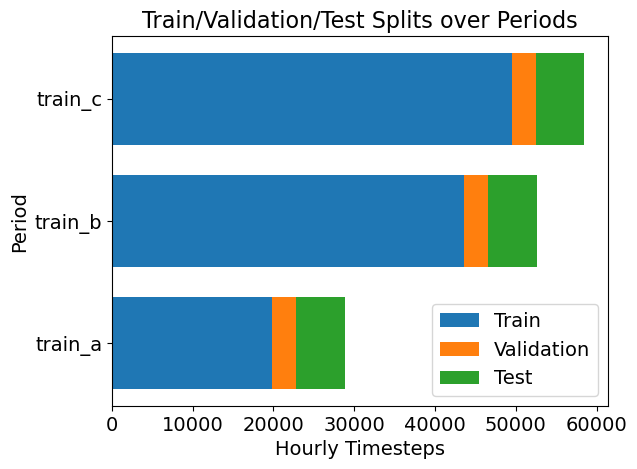

In [25]:
ind = [0, 1, 2]
names = ["train_a", "train_b", "train_c"]
width = 0.75
train_cnts = [len(df) for _, df in train.groupby("period")]
val_cnts = [len(df) for _, df in val.groupby("period")]
test_cnts = [len(df) for _, df in test.groupby("period")]

p1 = plt.barh(ind, train_cnts, width)
p2 = plt.barh(ind, val_cnts, width, left=train_cnts)
p3 = plt.barh(ind, test_cnts, width, left=np.add(val_cnts, train_cnts).tolist())

plt.yticks(ind, names)
plt.ylabel("Period")
plt.xlabel("Hourly Timesteps")
plt.title("Train/Validation/Test Splits over Periods", fontsize=16)
plt.legend(["Train", "Validation", "Test"])

### Final look at the shapes of our "Training", "Test", and "Validation" datasets

In [26]:
print(train.shape)

(112872, 17)


In [27]:
print(test.shape)

(18000, 17)


In [28]:
print(val.shape)

(9000, 17)


In [29]:
import tensorflow.keras as keras

import glob
# List existing LSTM models:
dir_list = glob.glob('trained_models_lstm/model_lstm_*/')
print('Here is a list of pre-trained models:\n')
for i in range(len(dir_list)):
    print('    %d: %s' % (i, dir_list[i]))

Here is a list of pre-trained models:

    0: trained_models_lstm/model_lstm_nepochs-04_nneurons-0016/
    1: trained_models_lstm/model_lstm_nepochs-20_nneurons-0512/


### Define and Build our LSTM Model

#### Define LSTM Model

<div class="alert alert-block alert-success">
<b>Exercise (highly recommended):</b> The least complex LSTM hyper parameters are set for notebook execution speed (i.e. few neurons and training epochs) and thus training does not fully converge. You you can select a predefined <b>model_config</b> by commenting out the appropriate line below or set the <b>model_config</b> yourself and evaluate consequences on model convergence in this notebook, as well as storm event use case performance in the <b>Chapter 2</b> notebook.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> The MagNet challenge benchmark LSTM used 512 neurons. Several options are listed below including an estimate of the training time required using Google Colab.
</div>

<div class="alert alert-block alert-warning">
<b>Be Aware: </b>The least performant 'model_config' below is for notebook execution speed and training will not fully converge. Set 'model_config' to the MagNet benchmark case for convergence and benchmark performance.
</div>

In [30]:
# Define and Train a New Model
from keras.layers import Dense, LSTM
from keras.models import Sequential

# Define our model
data_config = {
    "timesteps": 32,
    "batch_size": 32,
}
print('data_config = ')
pprint.pprint(data_config)

# Hyper Parameter Tuning
#
# Going Big (takes hours):
#      model_config = {"n_epochs": 30, "n_neurons": 2048, "dropout": 0.4, "stateful": False}
#
# Original from MagNet blogpost benchmark, takes about 1.5 hours:
model_config = {"n_epochs": 20, "n_neurons": 512, "dropout": 0.4, "stateful": False}
#
# Takes 10-15 minutes (moderate performance):
#      model_config = {"n_epochs": 8, "n_neurons": 64, "dropout": 0.4, "stateful": False}
#
# Takes 20 seconds (anticipate bad performance):
#      model_config = {"n_epochs": 4, "n_neurons": 16, "dropout": 0.4, "stateful": False}

model = Sequential()
model.add(
    LSTM(
        model_config["n_neurons"],
        # usually set to (`batch_size`, `sequence_length`, `n_features`)
        # setting the batch size to None allows for variable length batches
        batch_input_shape=(None, data_config["timesteps"], len(XCOLS)),
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],
    )
)
model.add(Dense(len(YCOLS)))
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    run_eagerly=None,     # set to True for debugging (very slow), None or False
)

model.summary()


data_config = 
{'batch_size': 32, 'timesteps': 32}


2023-08-14 21:35:58.435779: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1081344   
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 1,082,370
Trainable params: 1,082,370
Non-trainable params: 0
_________________________________________________________________


### Train Model

#### BatchDataset: Training, Validation and Test Data
In order to train and/or test our New or Pre-trained model, we'll create <i>[tensorflow.python.data.ops.dataset_ops.BatchDataset](https://www.tensorflow.org/guide/data#batching_dataset_elements)</i> structures for our Training, Validation and Test DataFrames.

In [31]:
import tensorflow.keras as keras
from keras import preprocessing

def timeseries_dataset_from_df(df, batch_size):
    """Provides a batched dataset as pd.DataFrame
    
    Parameters
    ----------
    df : pd.DataFrame
    batch_size : int

    Returns
    -------
    dataset : pd.DataFrame
        Batched data.
    """
    
    dataset = None
    timesteps = data_config["timesteps"]

    # iterate through periods
    for _, period_df in df.groupby("period"):
        # realign features and labels so that first sequence of 32 is aligned with the 33rd target
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]

        period_ds = keras.preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset



In [32]:
train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds   = timeseries_dataset_from_df(val,   data_config["batch_size"])
test_ds  = timeseries_dataset_from_df(test,  data_config["batch_size"])

print(f"Number of training batches: {len(train_ds)}")
print(f"Number of validation batches: {len(val_ds)}")
print(f"Number of test batches: {len(test_ds)}")

Number of training batches: 3523
Number of validation batches: 276
Number of test batches: 558


In [33]:
# Train Model
history_keras = model.fit(
    train_ds,
    batch_size=data_config["batch_size"],
    epochs=model_config["n_epochs"],
    verbose=True,
    shuffle=False,
    validation_data=val_ds,
)
history = history_keras.history     # Convert Keras 'history' callback reference to a simple dictionary.
                                    # This will make saving and loading as a pickle easier, i.e. while
                                    # the TAI4ES Jupyter "GPU" environment did not have trouble saving/pickling
                                    # as a weak reference to the keras object, the "CPU" environment gave
                                    # error "TypeError: cannot pickle 'weakref' object".

Epoch 1/20
3523/3523 [==============================] - 501s 142ms/step - loss: 322.2149 - val_loss: 528.2767
Epoch 2/20
3523/3523 [==============================] - 352s 100ms/step - loss: 270.9564 - val_loss: 428.2550
Epoch 3/20
3523/3523 [==============================] - 338s 96ms/step - loss: 211.8180 - val_loss: 365.3229
Epoch 4/20
3523/3523 [==============================] - 305s 87ms/step - loss: 176.5962 - val_loss: 296.9467
Epoch 5/20
3523/3523 [==============================] - 301s 85ms/step - loss: 154.6030 - val_loss: 269.1597
Epoch 6/20
3523/3523 [==============================] - 289s 82ms/step - loss: 140.2445 - val_loss: 257.4117
Epoch 7/20
3523/3523 [==============================] - 283s 80ms/step - loss: 131.9551 - val_loss: 245.8935
Epoch 8/20
3523/3523 [==============================] - 289s 82ms/step - loss: 128.2601 - val_loss: 224.3057
Epoch 9/20
3523/3523 [==============================] - 274s 78ms/step - loss: 123.8335 - val_loss: 217.1344
Epoch 10/20
3523/

### Evaluate Trained Model

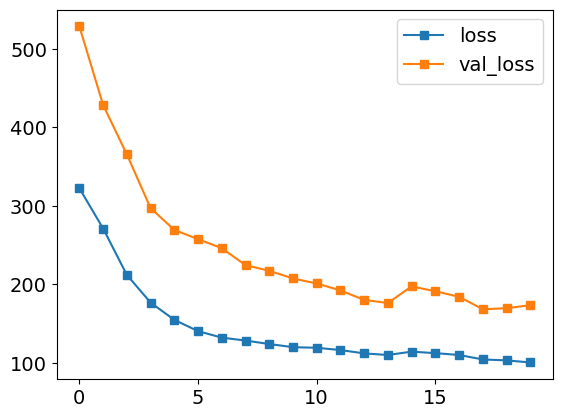

In [34]:
for name, values in history.items():
    plt.plot(values, 's-', label=name)
plt.legend(fontsize=14)
plt.show()

In [35]:
rmse = model.evaluate(test_ds)**0.5
print(f"Test RMSE: {rmse:.2f} nano-Tesla")

558/558 [==============================] - 14s 26ms/step - loss: 163.6485
Test RMSE: 12.79 nano-Tesla


### Save Model and Scaler

<div class="alert alert-block alert-info">
<b>Tip:</b> We need to save both the Model and the Scaler. Recall that we used a scaler (mean and standard deviation) to scale the features. We'll need to save both the trained model and scaler if we'd like to use it again in a future Jupyter session without having to retrain.
</div>

#### Save: New Model, Scaler, History and Configuration

In [36]:
# Pickle the Scaler and History, and JSON the Config
import json
import pickle

# Keep our models in their own subdirectories
dir_model = 'trained_models_lstm/model_lstm_nepochs-%02d_nneurons-%04d/' % \
    (model_config['n_epochs'], model_config['n_neurons'])

# Save Model
model.save(dir_model)

# Save Scaler (pickle)
with open(dir_model+"/scaler.pck", "wb") as f:
    pickle.dump(scaler, f)

# Save History (pickle)
with open(dir_model+"/history.pck", "wb") as f:
    pickle.dump(history, f)

# Save Configuration (as JSON)
data_config["solar_wind_subset"] = SOLAR_WIND_FEATURES
with open(dir_model+"/config.json", "w") as f:
    json.dump(data_config, f)

print('Saved model to %s' % dir_model)

2023-08-14 23:11:53.091652: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: trained_models_lstm/model_lstm_nepochs-20_nneurons-0512/assets


INFO:tensorflow:Assets written to: trained_models_lstm/model_lstm_nepochs-20_nneurons-0512/assets


Saved model to trained_models_lstm/model_lstm_nepochs-20_nneurons-0512/


---

## Exercises

### Additional Excercises - Using the current notebook

The following exercises are designed to help expand your intuition, by extending concepts in earlier sections. You should find these straight forward to engage in, using the materials in this notebook plus a couple of supplementary resources as indicated below.

<div class="alert alert-block alert-success">
<b>Exercise: </b> Adjust the list of inputs (features) used to train the model and compare the traing, validation and test losses. Using the <b>Chapter 2</b> notebook you can also compare the performance differences in predicting specific storms.
</div>

<div class="alert alert-block alert-success">
<b>Exercise: </b> Are there any additional inputs (features) we should consider adding to improve our prediction of <i>Dst</i>?
</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> Improving Performance: 
    
What hyper parameter changes to the LSTM architecture might you explore to increase its performance?
</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> Instrument Availability:

If one or more solar wind instruments were to degrade on orbit how might this impact model performance?
</div>

<div class="alert alert-block alert-info">
<b>Hint:</b> Review the model sensitivities to the input parameters via the permutation importance section.
</div>

<div class="alert alert-block alert-success">
<b>Exercise: </b> In this LSTM notebook, we use means and standard deviations. Optionally try different statistical tools such as medians and interquartile ranges, such as used in our sibling CNN notebook.
</div>

<div class="alert alert-block alert-success">
<b>Exercise: </b>Degraded Observations

Degrade the instrument measurements and run the model to see how the performance is impacted. Start simple by adding Gaussian noise (mean 0), to the least important and the most important input parameters (aka features) and evaluating a specific event.
</div>

---

## Next steps

Congratulations on engaging with the learning objectives of this MagNet Chapter 1 LSTM focused notebook--the benchmark from the NOAA MagNet competition. There is one additional <b>Chapter 2</b> notebook in the MagNet LSTM series, on explainable AI (XAI) and includes using the model you've built to explore <i>Dst</i> prediction for user chosen storms.

There is an additional NCAI notebook in preparation for this MagNet series:
A higher performing ensemble Convolutional Neural Netowork (CNN) from the NOAA Geomagnetism team based on the 2nd place entry from the MagNet competition. 
As mentioned in an earlier section, this notebook's precursor is the [TAI4ES Space Weather CNN Notebook](https://github.com/ai2es/tai4es-trustathon-2022/tree/main/space)

Additionally, a web search will provide other <i>Dst</i> modeling notebooks and publications using ML techniques.

---

## Examples in the community

For a comprehensive treatment of the need to build robust predictions of the <i>Dst</i> space weather storm indicator (e.g. for magnetic navigation applications), see Nair et al., 2023 and references therein:
* Nair et al., 2023 (<i>in press</i>) (TODO: Update with public URL as soon as available),

For a summary, see:
* https://www.drivendata.org/competitions/73/noaa-magnetic-forecasting/


---

## Data statement
The competition discussed above used <i>public</i> data for development and the public leaderboard. A <i>private</i> dataset was kept internal during the competition for use in scoring by the organizers. Since the competition has passed, both datasets are publicly accessible from NOAA.

All data used in this notebook are publicly available here:
* https://ngdc.noaa.gov/geomag/data/geomag/magnet/public.zip
* https://ngdc.noaa.gov/geomag/data/geomag/magnet/private.zip

---

## References

* Nair, M., Redmon, R.J., Young, L.Y., Chulliat, A., Trotta, B., Chung, C., Lipstein, G., Slavitt, I. (2023),"MagNet - a data-science competition to predict Disturbance Storm-time index (Dst) from solar wind data", Space Weather, <i>In Press</i>. (TODO: update with URL once available.)
* [CIRES GeoMag MagNet repository](https://github.com/liyo6397/MagNet/), TODO: update URL to new CIRES repo.
* [Trustworthy Artificial Intelligence for Environmental Science 2022 Summer School](https://www2.cisl.ucar.edu/events/tai4es-2022-summer-school), TAI4ES, accessed July 2022.
* [TAI4ES Space Weather Notebooks (LSTM, CNN)](https://github.com/ai2es/tai4es-trustathon-2022/tree/main/space), GitHub, accessed July 2022.
* [MagNet: Model the Geomagnetic Field](https://ngdc.noaa.gov/geomag/mag-net-challenge.html), NOAA, accessed March 2022.
* Chung, C. (2020), "HOW TO PREDICT DISTURBANCES IN THE GEOMAGENTIC FIELD WITH LSTMS - BENCHMARK", Blogpost, Accessed March 2022, Available Online: https://drivendata.co/blog/model-geomagnetic-field-benchmark/.
* DrivenData (2020), "MagNet: Model the Geomagnetic Field", Web Resource, Accessed March 2022, Available Online: https://www.drivendata.org/competitions/73/noaa-magnetic-forecasting/.
* [Interpretable Machine Learning by Christop Molnar](https://christophm.github.io/interpretable-ml-book/shap.html)
* Redmon, R. J., Seaton, D. B., Steenburgh, R., He, J., & Rodriguez, J. V. (2018). September 2017's geoeffective space weather and impacts to Caribbean radio communications during hurricane response. Space Weather, 16, 1190–1201. https://doi.org/10.1029/2018SW001897

---

## Metadata
 * Language / package(s):
     * Language: Python, 
     * Packages: Keras Tensor Flow, Matplotlib, Numpy, Pandas, Scikit-learn
 * Scientific domain:
     * Space Weather, Geomagnetic modeling
 * Application keywords
     * Magnetic Navigation
 * Geophysical keywords
     * Disturbance Storm Index (<i>Dst</i>), Solar Wind
 * AI keywords
     * Long Short-Term Memory (LSTM)

---

## License

### Software and Content Description License
Software code created by U.S. Government employees is not subject to copyright in the United States (17 U.S.C. §105). The United States/Department of Commerce reserve all rights to seek and obtain copyright protection in countries other than the United States for Software authored in its entirety by the Department of Commerce. To this end, the Department of Commerce hereby grants to Recipient a royalty-free, nonexclusive license to use, copy, and create derivative works of the Software outside of the United States.

---

## Disclaimer

> This Jupyter notebook is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, or the United States Department of Commerce. All NOAA Jupyter notebooks are provided on an 'as is' basis and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this Jupyter notebook will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.